<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/DATA606_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
from google.colab import drive
drive.mount('/content/gdrive/')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd

import glob, os
import cv2
from io import BytesIO
from IPython.display import Image
import random
from skimage import io

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#images data directory
img_folder='/content/gdrive/MyDrive/DATA606/GoogleImages/data/images'

# Looking at the training images

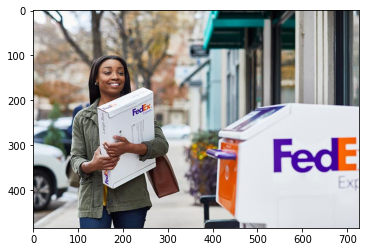

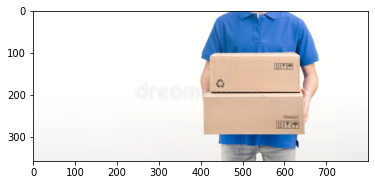

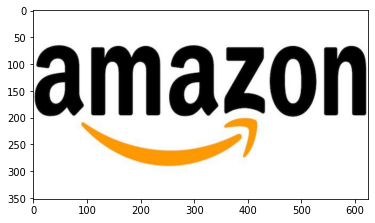

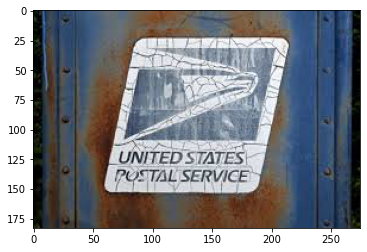

In [ ]:
images=[] # list to stroe path for each image
for img in os.listdir(img_folder):
  images.append(os.path.join(img_folder,img))

img_print=random.sample(images,5) #randomly selecting 5 images from the folder 

# displaying the images
for imgs in img_print:
  img_disp=io.imread(imgs)
  plt.imshow(img_disp)
  plt.show()

In [ ]:
images=[]
for img in os.listdir(img_folder):
  images.append(os.path.join(img_folder,img))

img_print=random.sample(images,5) # randomly displaying 5 images

for imgs in img_print:
  display(Image(imgs))

### As you can see we have images of different size for training.

### Classes include - amazon, ups, usps, fedex, box

# Looking at the images after they are annotated

Data labeling for these images(with bounding boxes) is done using a opensource GUI tool - [labelImg](https://github.com/tzutalin/labelImg)

Snapshot of labeling: labelling.PNG


Annotation text:

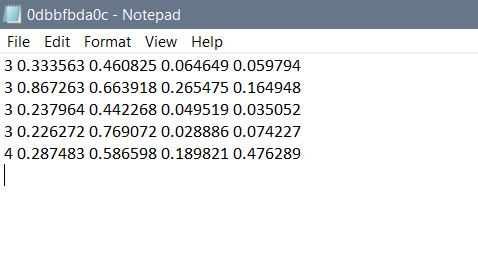

YOLO format -(class_id) (Xcentre) (Ycentre) (Width) (Height)

# Data Augmentation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm


import sys
sys.path.append('/content/gdrive/MyDrive/DATA606/GoogleImages/data')


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd

from sklearn.metrics import accuracy_score

import time

import torchvision 
from torchvision import transforms

from PIL import Image

In [ ]:
#Several built-in transformations, given some agressive values to make their impact more obvious.  
sample_transforms = {
    "Rotation" : transforms.RandomAffine(degrees=45),
    #"Translation" : transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
    #"Shear": transforms.RandomAffine(degrees=0, shear=45),
    #"RandomCrop" : transforms.RandomCrop((20,20)),
    
    "Horizontal Flip" : transforms.RandomHorizontalFlip(p=1.0),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    #"Perspective": transforms.RandomPerspective(p=1.0),   
    #"ColorJitter" : transforms.ColorJitter(brightness=0.9, contrast=0.9)
}

In [ ]:
#Convert the Tensor image back to a PIL image using a transform
pil_img = Image.open('/content/gdrive/MyDrive/DATA606/GoogleImages/data/images/cdba407d3c.jpg')
f, axarr = plt.subplots(2,3)
  
for count, (name, t) in enumerate(sample_transforms.items()):
  row = count % 3
  col = count // 3
  axarr[col,row].imshow(t(pil_img), cmap='gray')
  axarr[col,row].set_title(name)
plt.show()

In [ ]:
import numpy as np
import imageio
from imgaug import augmenters as iaa

In [ ]:
path = '/content/gdrive/MyDrive/DATA606/GoogleImages/data/images'

#ia.seed(2)

seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Crop(percent=(0, 0.1)),
    iaa.Affine(rotate=(-25,25))
], random_order=True)

#for folder in os.listdir(path):
#    i = 0
for fname in os.listdir(path + '/' + folder):
  img = imageio.imread(path + '/' + folder + '/' + fname)
  print('Original:')
  ia.imshow(img)
  img_aug = seq.augment_image(img)
  print('Augmented:')
  ia.imshow(img_aug)
  imageio.imwrite(os.path.join(path, path + '\\' + folder + '\\' + folder + "%06d.png" % (i,)), img_aug)
        i += 1

NotADirectoryError: ignored

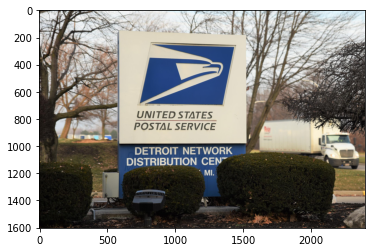

In [ ]:
imshow(pi)